# PREPROCESAMIENTO DE DATOS


In [1]:
# Importamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Primer vistazo al dataset
mushrooms = pd.read_csv("/content/drive/MyDrive/PROYECTO IA /Data/mushrooms.csv")
mushrooms.head()

class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]

In [3]:
mushrooms.shape

(8124, 23)

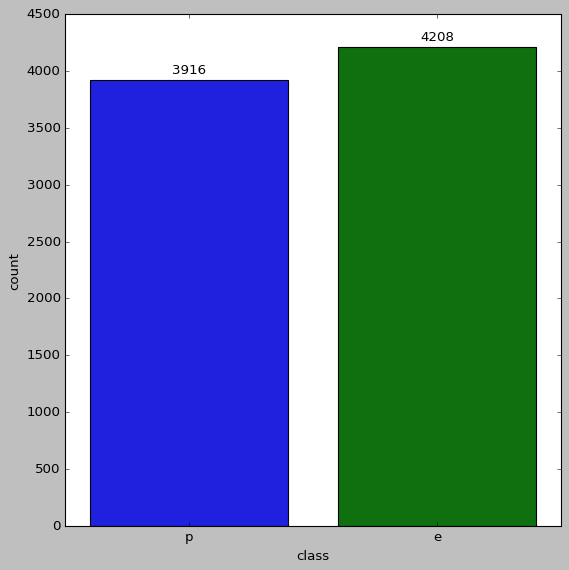

In [4]:
#Con esta gráfica podemos observar la cantidad de hongos venenosos y comestibles 

plt.style.use('classic')
plt.rcParams['figure.figsize']=8,8 
s = sns.countplot(x = "class", data = mushrooms)
for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

In [5]:
#Podemos observar la cantidad de columnas con sus valores unicos

pd.concat({'unique values': mushrooms.apply(pd.unique), 'number of unique values': mushrooms.nunique()}, axis=1)

unique values  number of unique values
class                                                   [p, e]                        2
cap-shape                                   [x, b, s, f, k, c]                        6
cap-surface                                       [s, y, f, g]                        4
cap-color                       [n, y, w, g, e, p, b, u, c, r]                       10
bruises                                                 [t, f]                        2
odor                               [p, a, l, n, f, c, y, s, m]                        9
gill-attachment                                         [f, a]                        2
gill-spacing                                            [c, w]                        2
gill-size                                               [n, b]                        2
gill-color                [k, n, g, p, w, h, u, e, b, r, y, o]                       12
stalk-shape                                             [e, t]                        2
stalk-root                                     [e, c, b, r, ?]                        5
stalk-surface-above-ring                          [s, f, k, y]                        4
stalk-surface-below-ring                          [s, f, y, k]                        4
stalk-color-above-ring             [w, g, p, n, b, e, o, c, y]                        9
stalk-color-below-ring             [w, p, g, b, n, e, y, o, c]                        9
veil-type                                                  [p]                        1
veil-color                                        [w, n, o, y]                        4
ring-number                                          [o, t, n]                        3
ring-type                                      [p, e, l, f, n]                        5
spore-print-color                  [k, n, u, h, w, r, o, y, b]                        9
population                                  [s, n, a, v, y, c]                        6
habitat                                  [u, g, m, d, p, w, l]                        7

In [6]:
#Removemos la columna veil type de nuestro dataframe ya que solo tiene un posible valor.

mushrooms.drop('veil-type', axis=1, inplace=True)

In [7]:
#Verificamos que no existan valores NaN

mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# ESTA ES LA PRIMERA CODIFICACIÓN SIN OHE.

from sklearn.preprocessing import LabelEncoder

mushroomsLE = mushrooms.copy()
les = {col: LabelEncoder() for col in mushrooms.columns}

for col in les:
    mushroomsLE[col] = les[col].fit_transform(mushrooms[col])
    
mushrooms.head()

class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 22 columns]

In [9]:
mushroomsLE.head() #MushroomsLE almacena la codificación sin OHE.

class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0      1          5            2  ...                  2           3        5
1      0          5            2  ...                  3           2        1
2      0          0            2  ...                  3           2        3
3      1          5            3  ...                  2           3        5
4      0          5            2  ...                  3           0        1

[5 rows x 22 columns]

In [10]:
#Permutamos nuestros datos y separamos nuestra clase de los demás valores tanto para mushroomsP como mushroomsLE

mushroomsP = mushrooms.sample(frac = 1)

xoh = mushroomsP.iloc[:,1:].values
yoh = mushroomsP.iloc[:,0].values
xle = mushroomsLE.iloc[:,1:].values
yle = mushroomsLE.iloc[:,0].values

In [11]:
# Codificamos la variable de la clase usando LabelEncoder
# Los valores 1 son los hongos venenosos y los valores 0 son los comestibles
le = LabelEncoder()
yoh = le.fit_transform(yoh)
print(yoh)


[1 0 0 ... 0 1 1]


In [12]:
# Realizamos one hot encoding a las demás variables que se encuentran en x utilizando OHE.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
xoh = onehotencoder.fit_transform(xoh).toarray()
xoh.shape

(8124, 116)

In [ ]:
xoh.shape #Datos codificados con OHE

(8124, 116)

In [13]:
xle.shape #Datos codificados con LE

(8124, 21)

In [14]:
print(xoh)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [15]:
print(xle)

[[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]


In [16]:
# Realizamos el split del dataset en entrenamiento y testeo con un 30% de los datos para testeo. ONE HOT ENCODING
from sklearn.model_selection import train_test_split
x_trainoh, x_testoh, y_trainoh, y_testoh = train_test_split(xoh, yoh, test_size = 0.3)

In [17]:
# Realizamos el split del dataset en entrenamiento y testeo con un 30% de los datos para testeo. LABEL ENCODING
from sklearn.model_selection import train_test_split
x_trainle, x_testle, y_trainle, y_testle = train_test_split(xle, yle, test_size = 0.3)

In [18]:
# Aplicamos PCA para reducir la cantidad de columnas. ONE HOT ENCODING
from sklearn.decomposition import PCA
pcaoh = PCA(n_components = 3)
x_trainohPCA = pcaoh.fit_transform(x_trainoh)
x_testohPCA = pcaoh.transform(x_testoh)

In [19]:
# Aplicamos PCA para reducir la cantidad de columnas. LABEL ENCODING
from sklearn.decomposition import PCA
pcale = PCA(n_components = 3)
x_trainlePCA = pcale.fit_transform(x_trainle)
x_testlePCA = pcale.transform(x_testle)

#NAIVE BAYES


In [20]:
# Entrenamos el modelo con el clasificador naive bayes sin ningún parametro especial.
from sklearn.naive_bayes import GaussianNB

#Clasificadores
classifieroh = GaussianNB()
classifierohPCA = GaussianNB()
classifierle = GaussianNB()
classifierlePCA = GaussianNB()

#Clasificadores fit.
classifieroh.fit(x_trainoh, y_trainoh)
classifierohPCA.fit(x_trainohPCA, y_trainoh)
classifierle.fit(x_trainle, y_trainle)
classifierlePCA.fit(x_trainlePCA, y_trainle)


GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
#Obtenemos la predicción para nuestro modelo ONE HOT ENCODING sin y con PCA.
predoh = classifieroh.predict(x_testoh)
predohPCA = classifierohPCA.predict(x_testohPCA)

In [22]:
#Obtenemos la predicción para nuestro modelo LABEL ENCODING sin y con PCA.
predle = classifierle.predict(x_testle)
predlePCA = classifierlePCA.predict(x_testlePCA)

In [23]:
#Realizamos la matriz de confusión y calculamos el accuracy score obtenido tanto para training como para test. ONE HOT ENCODING
from sklearn.metrics import confusion_matrix, accuracy_score
#Listas que servirán para graficar
acscoreOh = []
acscoreOhPCA = []

#Proceso de obtención de puntajes
cmOh = confusion_matrix(y_testoh, predoh)
cmOhPCA = confusion_matrix(y_testoh, predohPCA)
test_acc = accuracy_score(y_testoh, predoh)
PCA_acc = accuracy_score(y_testoh, predohPCA)
acscoreOh.append(test_acc)
acscoreOhPCA.append(PCA_acc)

print(test_acc)
print(PCA_acc)

0.9573420836751435
0.8826907301066448


In [ ]:
#Realizamos la matriz de confusión y calculamos el accuracy score obtenido tanto para training como para test. LABEL ENCODING
from sklearn.metrics import confusion_matrix, accuracy_score
#Listas que servirán para graficar
acscoreLe = []
acscoreLePCA = []

#Proceso de obtención de puntajes
cmLe = confusion_matrix(y_testle, predle)
cmLePCA = confusion_matrix(y_testle, predlePCA)
test_acc = accuracy_score(y_testle, predle)
PCA_acc = accuracy_score(y_testle, predlePCA)
acscoreLe.append(test_acc)
acscoreLePCA.append(PCA_acc)

print(test_acc)
print(PCA_acc)

0.9249384741591469
0.810090237899918


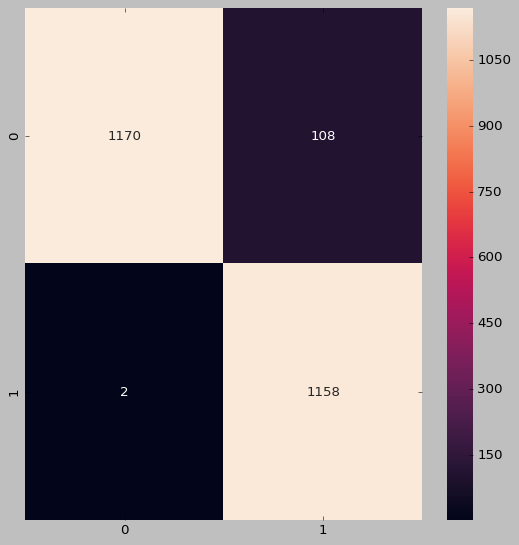

In [ ]:
 #Una mejor visualización a la matriz de confusión. ONE HOT ENCODING
sns.heatmap(cmOh,annot=True,fmt='d')
plt.show()

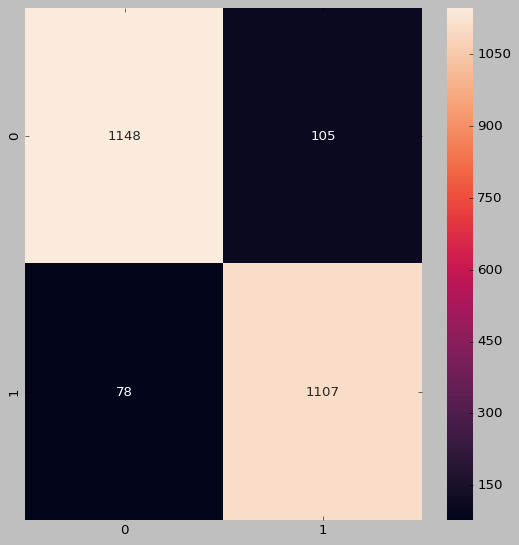

In [ ]:
 #Una mejor visualización a la matriz de confusión. LABEL ENCODING
sns.heatmap(cmLe,annot=True,fmt='d')
plt.show()

#SUPPORT VECTOR MACHINE

In [ ]:
# Entrenamos el modelo con el clasificador Support vector sin ningún parametro especial.

from sklearn.svm import SVC
#Clasificadores
classifierohSVC = SVC(kernel = 'rbf')
classifierohSVCPCA = SVC(kernel = 'rbf')
classifierleSVC = SVC(kernel = 'rbf')
classifierleSVCPCA = SVC(kernel = 'rbf')

#Clasificadores fit
classifierohSVC.fit(x_trainoh, y_trainoh)
classifierohSVCPCA.fit(x_trainohPCA, y_trainoh)
classifierleSVC.fit(x_trainle, y_trainle)
classifierleSVCPCA.fit(x_trainlePCA, y_trainle)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Obtenemos la predicción para nuestro modelo ONE HOT ENCODING sin y con PCA.

predoh = classifierohSVC.predict(x_testoh)
predohPCA = classifierohSVCPCA.predict(x_testohPCA)

In [ ]:
#Obtenemos la predicción para nuestro modelo LABEL ENCODING sin y con PCA.
predle = classifierleSVC.predict(x_testle)
predlePCA = classifierleSVCPCA.predict(x_testlePCA)

In [ ]:
#Realizamos la matriz de confusión y calculamos el accuracy score obtenido tanto para training como para test. ONE HOT ENCODING
from sklearn.metrics import confusion_matrix, accuracy_score
#Listas que servirán para graficar

#Proceso de obtención de puntajes
cmOh = confusion_matrix(y_testoh, predoh)
cmOhPCA = confusion_matrix(y_testoh, predohPCA)
test_acc = accuracy_score(y_testoh, predoh)
PCA_acc = accuracy_score(y_testoh, predohPCA)
acscoreOh.append(test_acc)
acscoreOhPCA.append(PCA_acc)

print(test_acc)
print(PCA_acc)

1.0
0.9520098441345365


In [ ]:
#Realizamos la matriz de confusión y calculamos el accuracy score obtenido tanto para training como para test. LABEL ENCODING
from sklearn.metrics import confusion_matrix, accuracy_score
#Listas que servirán para graficar

#Proceso de obtención de puntajes
cmLe = confusion_matrix(y_testle, predle)
cmLePCA = confusion_matrix(y_testle, predlePCA)
test_acc = accuracy_score(y_testle, predle)
PCA_acc = accuracy_score(y_testle, predlePCA)
acscoreLe.append(test_acc)
acscoreLePCA.append(PCA_acc)

print(test_acc)
print(PCA_acc)

0.9872846595570139
0.9056603773584906


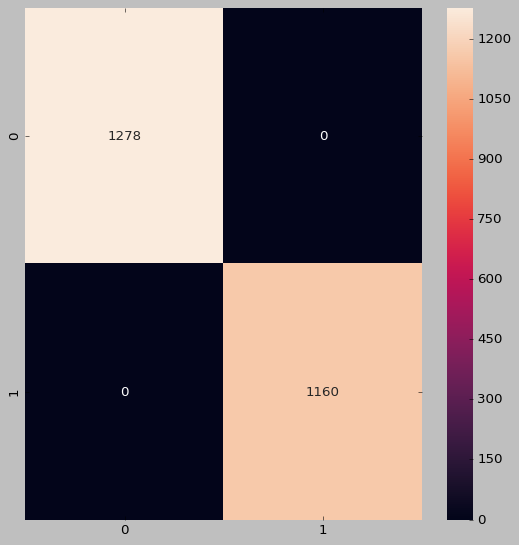

In [ ]:
#Una mejor visualización a la matriz de confusión.
sns.heatmap(cmOh,annot=True,fmt='d')
plt.show()

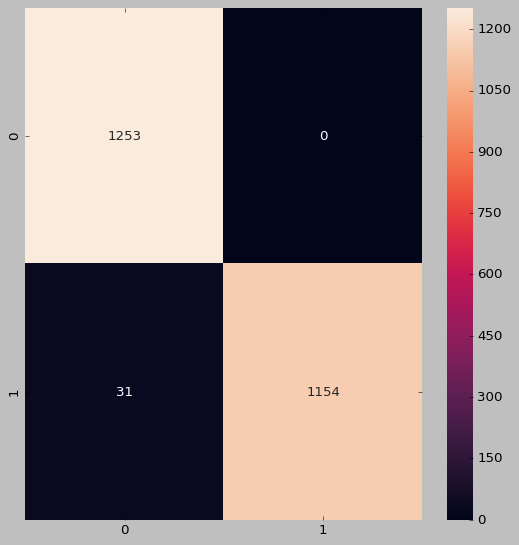

In [ ]:
 #Una mejor visualización a la matriz de confusión. LABEL ENCODING
sns.heatmap(cmLe,annot=True,fmt='d')
plt.show()

#Decision Tree Classifier

In [ ]:
# Entrenamos el modelo con el clasificador Decision Tree sin ningún parametro especial.

from sklearn.tree import DecisionTreeClassifier

#Clasificadores
classifierohDT = DecisionTreeClassifier(criterion = 'entropy')
classifierohDTPCA = DecisionTreeClassifier(criterion = 'entropy')
classifierleDT = DecisionTreeClassifier(criterion = 'entropy')
classifierleDTPCA = DecisionTreeClassifier(criterion = 'entropy')

#Clasificadores fit
classifierohDT.fit(x_trainoh, y_trainoh)
classifierohDTPCA.fit(x_trainohPCA, y_trainoh)
classifierleDT.fit(x_trainle, y_trainle)
classifierleDTPCA.fit(x_trainlePCA, y_trainle)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Obtenemos la predicción para nuestro modelo ONE HOT ENCODING sin y con PCA.

predoh = classifierohDT.predict(x_testoh)
predohPCA = classifierohDTPCA.predict(x_testohPCA)

In [ ]:
#Obtenemos la predicción para nuestro modelo LABEL ENCODING sin y con PCA.
predle = classifierleDT.predict(x_testle)
predlePCA = classifierleDTPCA.predict(x_testlePCA)

In [ ]:
#Realizamos la matriz de confusión y calculamos el accuracy score obtenido tanto para training como para test. ONE HOT ENCODING
from sklearn.metrics import confusion_matrix, accuracy_score
#Listas que servirán para graficar

#Proceso de obtención de puntajes
cmOh = confusion_matrix(y_testoh, predoh)
cmOhPCA = confusion_matrix(y_testoh, predohPCA)
test_acc = accuracy_score(y_testoh, predoh)
PCA_acc = accuracy_score(y_testoh, predohPCA)
acscoreOh.append(test_acc)
acscoreOhPCA.append(PCA_acc)

print(test_acc)
print(PCA_acc)

1.0
0.9922067268252666


In [ ]:
#Realizamos la matriz de confusión y calculamos el accuracy score obtenido tanto para training como para test. LABEL ENCODING
from sklearn.metrics import confusion_matrix, accuracy_score
#Listas que servirán para graficar

#Proceso de obtención de puntajes
cmLe = confusion_matrix(y_testle, predle)
cmLePCA = confusion_matrix(y_testle, predlePCA)
test_acc = accuracy_score(y_testle, predle)
PCA_acc = accuracy_score(y_testle, predlePCA)
acscoreLe.append(test_acc)
acscoreLePCA.append(PCA_acc)

print(test_acc)
print(PCA_acc)

1.0
0.9799015586546349


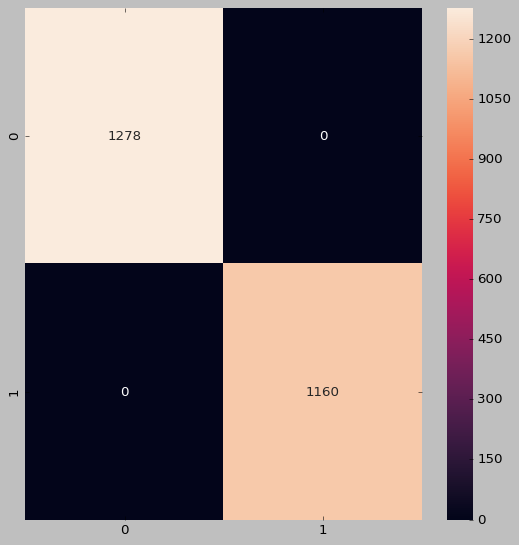

In [ ]:
#Una mejor visualización a la matriz de confusión.
sns.heatmap(cmOh,annot=True,fmt='d')
plt.show()

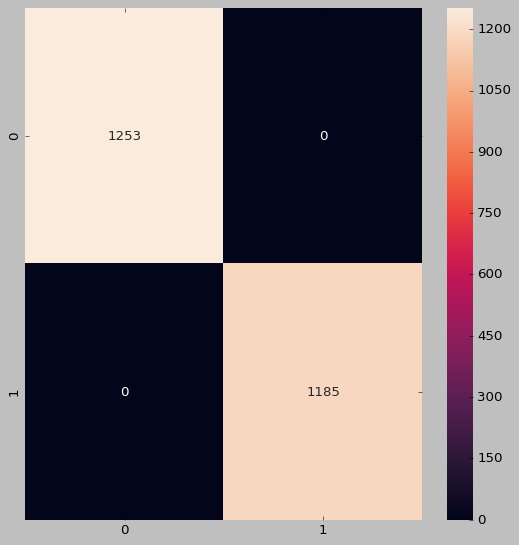

In [ ]:
#Una mejor visualización a la matriz de confusión.
sns.heatmap(cmLe,annot=True,fmt='d')
plt.show()

#Random Forest Classifier

In [ ]:
# Entrenamos el modelo con el clasificador Random Forest sin parametros especiales.

from sklearn.ensemble import RandomForestClassifier

#Clasificadores
classifierohRF = RandomForestClassifier(criterion = 'entropy', max_depth= None)
classifierohRFPCA = RandomForestClassifier(criterion = 'entropy', max_depth= None)
classifierleRF = RandomForestClassifier(criterion = 'entropy', max_depth= None)
classifierleRFPCA = RandomForestClassifier(criterion = 'entropy', max_depth= None)

#Clasificadores fit
classifierohRF.fit(x_trainoh, y_trainoh)
classifierohRFPCA.fit(x_trainohPCA, y_trainoh)
classifierleRF.fit(x_trainle, y_trainle)
classifierleRFPCA.fit(x_trainlePCA, y_trainle)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Obtenemos la predicción para nuestro modelo ONE HOT ENCODING sin y con PCA.

predoh = classifierohRF.predict(x_testoh)
predohPCA = classifierohRFPCA.predict(x_testohPCA)

In [ ]:
#Obtenemos la predicción para nuestro modelo LABEL ENCODING sin y con PCA.
predle = classifierleRF.predict(x_testle)
predlePCA = classifierleRFPCA.predict(x_testlePCA)

In [ ]:
#Realizamos la matriz de confusión y calculamos el accuracy score obtenido tanto para training como para test. ONE HOT ENCODING
from sklearn.metrics import confusion_matrix, accuracy_score


#Proceso de obtención de puntajes
cmOh = confusion_matrix(y_testoh, predoh)
cmOhPCA = confusion_matrix(y_testoh, predohPCA)
test_acc = accuracy_score(y_testoh, predoh)
PCA_acc = accuracy_score(y_testoh, predohPCA)
acscoreOh.append(test_acc)
acscoreOhPCA.append(PCA_acc)

print(test_acc)
print(PCA_acc)

1.0
0.9938474159146842


In [ ]:
#Realizamos la matriz de confusión y calculamos el accuracy score obtenido tanto para training como para test. LABEL ENCODING
from sklearn.metrics import confusion_matrix, accuracy_score
#Listas que servirán para graficar

#Proceso de obtención de puntajes
cmLe = confusion_matrix(y_testle, predle)
cmLePCA = confusion_matrix(y_testle, predlePCA)
test_acc = accuracy_score(y_testle, predle)
PCA_acc = accuracy_score(y_testle, predlePCA)
acscoreLe.append(test_acc)
acscoreLePCA.append(PCA_acc)

print(test_acc)
print(PCA_acc)

1.0
0.9823625922887613


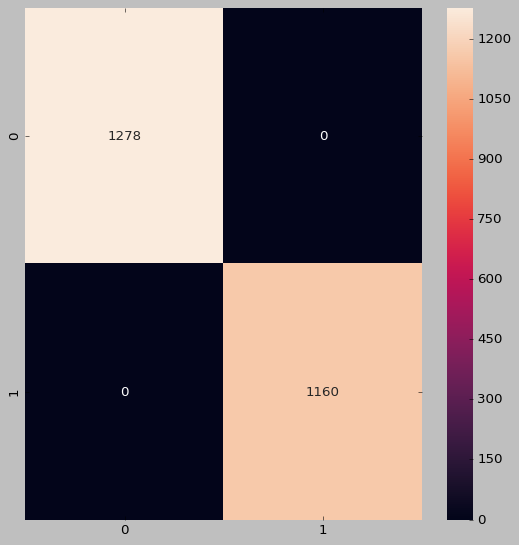

In [ ]:
#Una mejor visualización a la matriz de confusión.
sns.heatmap(cmOh,annot=True,fmt='d')
plt.show()

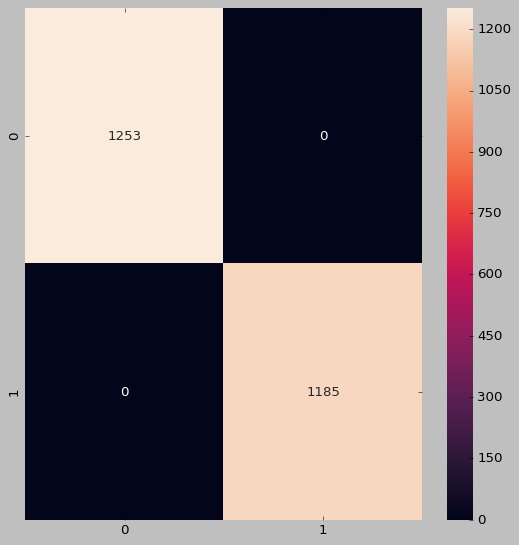

In [ ]:
#Una mejor visualización a la matriz de confusión.
sns.heatmap(cmLe,annot=True,fmt='d')
plt.show()

## Testeo usando Cross validation

In [ ]:
#Usamos Cross val para verificar si nuestro modelo posee overfitting. ONE HOT ENCODING

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
classifierOhNBCV = GaussianNB()
classifierOhSVCV = SVC(kernel= 'rbf')
classifierOhDTCV = DecisionTreeClassifier(criterion='entropy')
classifierOhRFCV = RandomForestClassifier(criterion='entropy')


crossvalOhNB = cross_val_score(classifierOhNBCV, xoh, yoh, cv=KFold(10, shuffle=False))
crossvalOhSVM = cross_val_score(classifierOhSVCV, xoh, yoh, cv=KFold(10, shuffle=False))
crossvalOhDT = cross_val_score(classifierOhDTCV, xoh, yoh, cv=KFold(10, shuffle=False))
crossvalOhRF = cross_val_score(classifierOhRFCV, xoh, yoh, cv=KFold(10, shuffle=False))

In [ ]:
#Usamos Cross val para verificar si nuestro modelo posee overfitting. LABEL ENCODING
classifierLeNBCV = GaussianNB()
classifierLeSVCV = SVC(kernel= 'rbf')
classifierLeDTCV = DecisionTreeClassifier(criterion='entropy')
classifierLeRFCV = RandomForestClassifier(criterion='entropy')


crossvalLeNB = cross_val_score(classifierLeNBCV, xle, yle, cv=KFold(10, shuffle=False))
crossvalLeSVM = cross_val_score(classifierLeSVCV, xle, yle, cv=KFold(10, shuffle=False))
crossvalLeDT = cross_val_score(classifierLeDTCV, xle, yle, cv=KFold(10, shuffle=False))
crossvalLeRF = cross_val_score(classifierLeRFCV, xle, yle, cv=KFold(10, shuffle=False))

In [ ]:
print(crossvalLeSVM)

[0.95325953 1.         1.         0.99753998 0.97536946 0.99507389
 0.908867   0.95935961 1.         0.99753695]


In [ ]:
#Lista de promedios de accuracy usando cross validation para poder gráficar. ONE HOT ENCODING
acscoreOhCV = [crossvalOhNB.mean(), crossvalOhSVM.mean(), crossvalOhDT.mean(), crossvalOhRF.mean()]

In [ ]:
#Lista de promedios de accuracy usando cross validation para poder gráficar. LABEL ENCODING
acscoreLeCV = [crossvalLeNB.mean(), crossvalLeSVM.mean(), crossvalLeDT.mean(), crossvalLeRF.mean()]

#GRÁFICAS DE LOS RESULTADOS ONE HOT ENCODING

Modelo 70% training 30% test sin usar PCA.

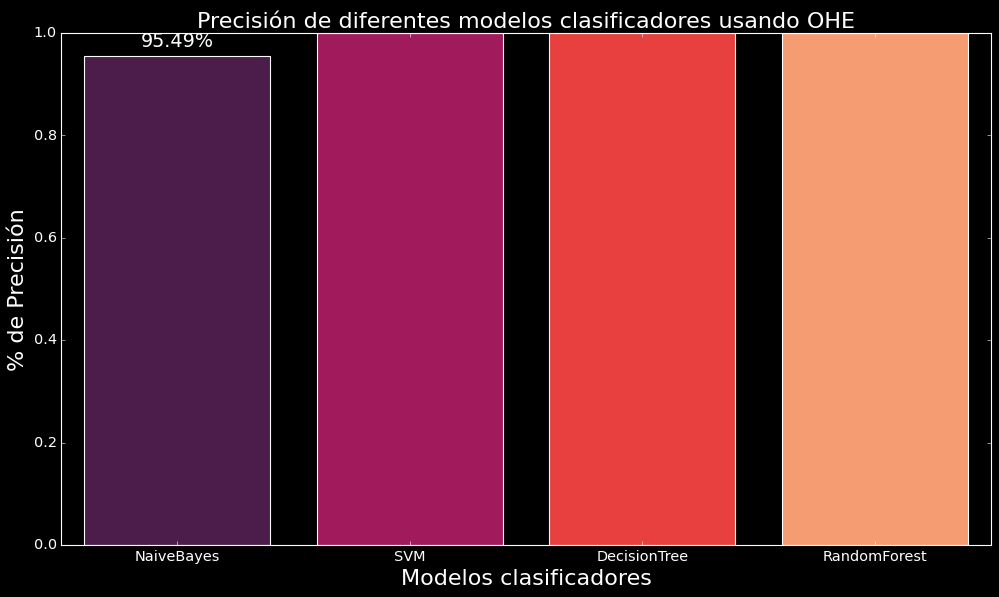

In [ ]:
# Visualización del accuracy score para cada modelo sin PCA.
models = ['NaiveBayes','SVM','DecisionTree','RandomForest']
plt.rcParams['figure.figsize']=15,8 
plt.style.use('dark_background')
ax = sns.barplot(x=models, y=acscoreOh, palette = "rocket", saturation =1.5)
plt.xlabel("Modelos clasificadores", fontsize = 20 )
plt.ylabel("% de Precisión", fontsize = 20)
plt.title("Precisión de diferentes modelos clasificadores usando OHE", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Modelo 70% Train 30% Test usando PCA

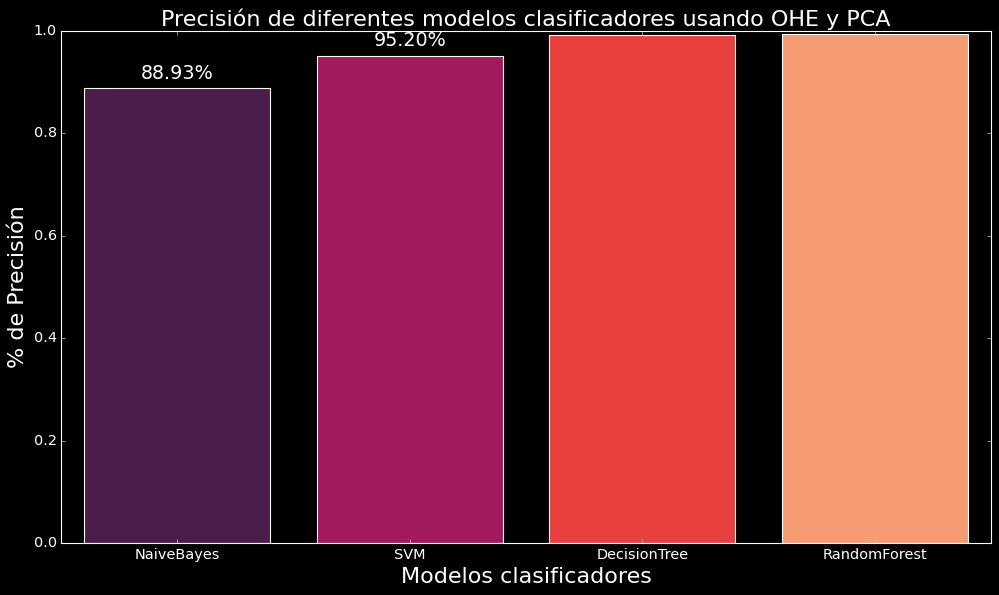

In [ ]:
# Visualización del accuracy score para cada modelo con PCA.
models = ['NaiveBayes','SVM','DecisionTree','RandomForest']
plt.rcParams['figure.figsize']=15,8 
plt.style.use('dark_background')
ax = sns.barplot(x=models, y=acscoreOhPCA, palette = "rocket", saturation =1.5)
plt.xlabel("Modelos clasificadores", fontsize = 20 )
plt.ylabel("% de Precisión", fontsize = 20)
plt.title("Precisión de diferentes modelos clasificadores usando OHE y PCA", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Modelo usando Cross validation

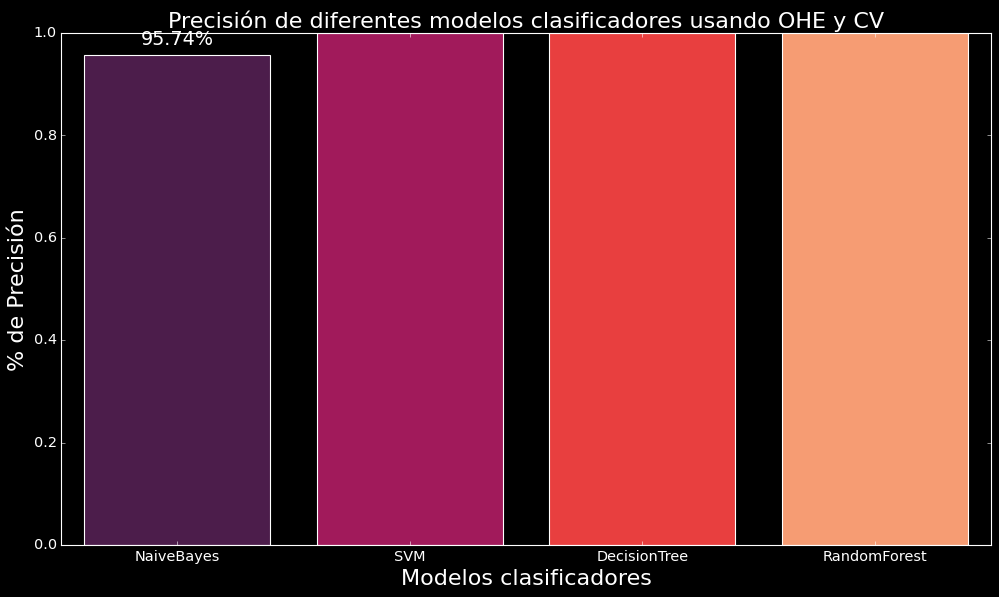

In [ ]:
# Visualización del accuracy score para cada modelo.
models = ['NaiveBayes','SVM','DecisionTree','RandomForest']
plt.rcParams['figure.figsize']=15,8 
plt.style.use('dark_background')
ax = sns.barplot(x=models, y=acscoreOhCV, palette = "rocket", saturation =1.5)
plt.xlabel("Modelos clasificadores", fontsize = 20 )
plt.ylabel("% de Precisión", fontsize = 20)
plt.title("Precisión de diferentes modelos clasificadores usando OHE y CV", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## GRÁFICAS DE LOS RESULTADOS LABEL ENCODING

Modelo 70% training 30% test sin usar PCA.

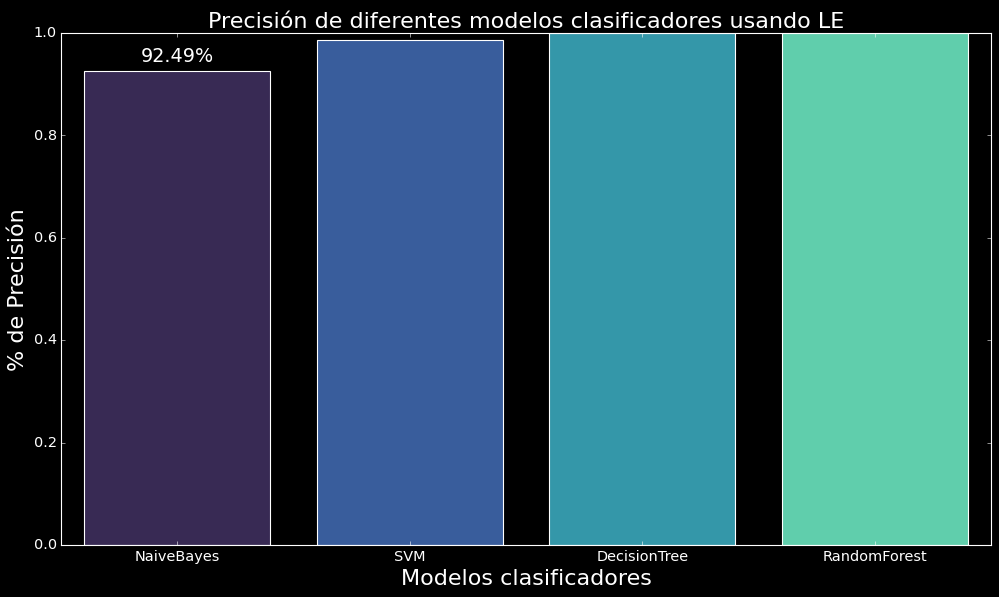

In [ ]:
# Visualización del accuracy score para cada modelo sin PCA.
models = ['NaiveBayes','SVM','DecisionTree','RandomForest']
plt.rcParams['figure.figsize']=15,8 
plt.style.use('dark_background')
ax = sns.barplot(x=models, y=acscoreLe, palette = "mako", saturation =1.5)
plt.xlabel("Modelos clasificadores", fontsize = 20 )
plt.ylabel("% de Precisión", fontsize = 20)
plt.title("Precisión de diferentes modelos clasificadores usando LE", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Modelo 70% training 30% test usando PCA.

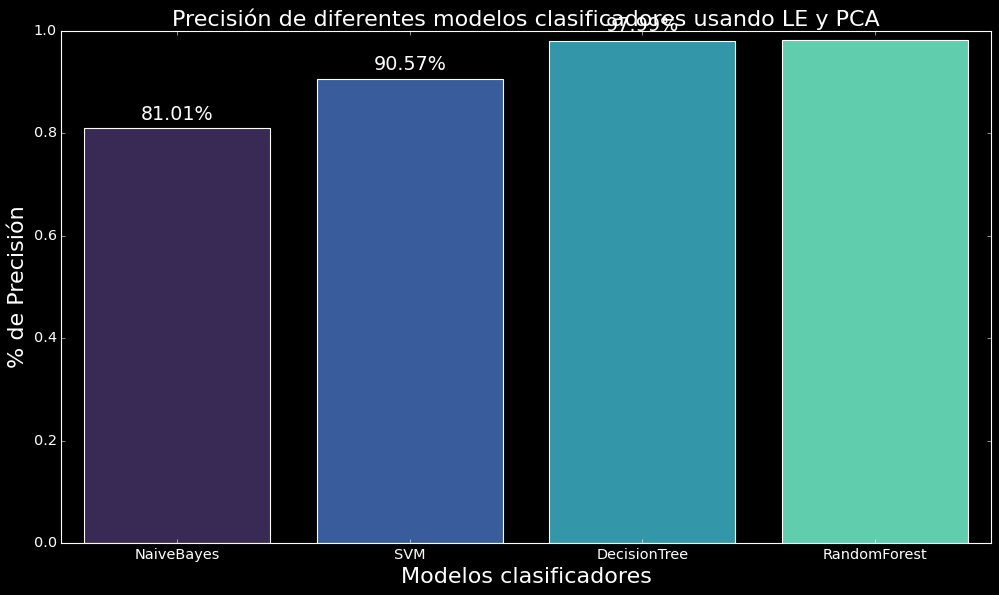

In [ ]:
models = ['NaiveBayes','SVM','DecisionTree','RandomForest']
plt.rcParams['figure.figsize']=15,8 
plt.style.use('dark_background')
ax = sns.barplot(x=models, y=acscoreLePCA, palette = "mako", saturation =1.5)
plt.xlabel("Modelos clasificadores", fontsize = 20 )
plt.ylabel("% de Precisión", fontsize = 20)
plt.title("Precisión de diferentes modelos clasificadores usando LE y PCA", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Modelo 70% training 30% test usando CV.

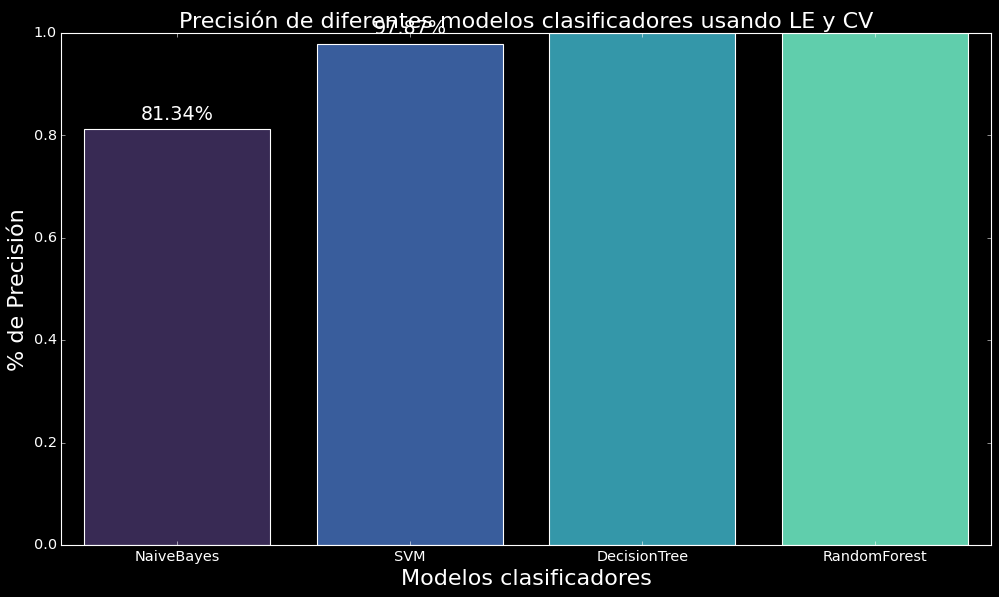

In [ ]:
models = ['NaiveBayes','SVM','DecisionTree','RandomForest']
plt.rcParams['figure.figsize']=15,8 
plt.style.use('dark_background')
ax = sns.barplot(x=models, y=acscoreLeCV, palette = "mako", saturation =1.5)
plt.xlabel("Modelos clasificadores", fontsize = 20 )
plt.ylabel("% de Precisión", fontsize = 20)
plt.title("Precisión de diferentes modelos clasificadores usando LE y CV", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()